# The purpose is to show the bz77

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[6])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files.remove('bzspectype.fits')

## Find the star-names in the files

In [14]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [15]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [16]:
filelist[:5]

['bz_1.fits', 'bz_10.fits', 'bz_11.fits', 'bz_12.fits', 'bz_13.fits']

In [17]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^bz_([0-9].*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append('bz_'+thenames[0])
    elif thefile=='bzspectype.fits':
        obj_names2.append('bzspectype')
    else:
        print 'bad file ',thefile
    index+=1

In [18]:
print obj_names2

['bz_1', 'bz_10', 'bz_11', 'bz_12', 'bz_13', 'bz_14', 'bz_15', 'bz_16', 'bz_17', 'bz_18', 'bz_19', 'bz_2', 'bz_20', 'bz_21', 'bz_22', 'bz_23', 'bz_24', 'bz_25', 'bz_26', 'bz_27', 'bz_28', 'bz_29', 'bz_3', 'bz_30', 'bz_31', 'bz_32', 'bz_33', 'bz_34', 'bz_35', 'bz_36', 'bz_37', 'bz_38', 'bz_39', 'bz_4', 'bz_40', 'bz_41', 'bz_42', 'bz_43', 'bz_44', 'bz_45', 'bz_46', 'bz_47', 'bz_48', 'bz_49', 'bz_5', 'bz_50', 'bz_51', 'bz_52', 'bz_53', 'bz_54', 'bz_55', 'bz_56', 'bz_57', 'bz_58', 'bz_59', 'bz_6', 'bz_60', 'bz_61', 'bz_62', 'bz_63', 'bz_64', 'bz_65', 'bz_66', 'bz_67', 'bz_68', 'bz_69', 'bz_7', 'bz_70', 'bz_71', 'bz_72', 'bz_73', 'bz_74', 'bz_75', 'bz_76', 'bz_77', 'bz_8', 'bz_9']


In [19]:
obj_names=obj_names2

In [20]:
print obj_files

['bz_1.fits', 'bz_10.fits', 'bz_11.fits', 'bz_12.fits', 'bz_13.fits', 'bz_14.fits', 'bz_15.fits', 'bz_16.fits', 'bz_17.fits', 'bz_18.fits', 'bz_19.fits', 'bz_2.fits', 'bz_20.fits', 'bz_21.fits', 'bz_22.fits', 'bz_23.fits', 'bz_24.fits', 'bz_25.fits', 'bz_26.fits', 'bz_27.fits', 'bz_28.fits', 'bz_29.fits', 'bz_3.fits', 'bz_30.fits', 'bz_31.fits', 'bz_32.fits', 'bz_33.fits', 'bz_34.fits', 'bz_35.fits', 'bz_36.fits', 'bz_37.fits', 'bz_38.fits', 'bz_39.fits', 'bz_4.fits', 'bz_40.fits', 'bz_41.fits', 'bz_42.fits', 'bz_43.fits', 'bz_44.fits', 'bz_45.fits', 'bz_46.fits', 'bz_47.fits', 'bz_48.fits', 'bz_49.fits', 'bz_5.fits', 'bz_50.fits', 'bz_51.fits', 'bz_52.fits', 'bz_53.fits', 'bz_54.fits', 'bz_55.fits', 'bz_56.fits', 'bz_57.fits', 'bz_58.fits', 'bz_59.fits', 'bz_6.fits', 'bz_60.fits', 'bz_61.fits', 'bz_62.fits', 'bz_63.fits', 'bz_64.fits', 'bz_65.fits', 'bz_66.fits', 'bz_67.fits', 'bz_68.fits', 'bz_69.fits', 'bz_7.fits', 'bz_70.fits', 'bz_71.fits', 'bz_72.fits', 'bz_73.fits', 'bz_74.fits'

In [21]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [22]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

bz_1 : 
bz_1.fits
bz_10 : 
bz_10.fits
bz_11 : 
bz_11.fits
bz_12 : 
bz_12.fits
bz_13 : 
bz_13.fits
bz_14 : 
bz_14.fits
bz_15 : 
bz_15.fits
bz_16 : 
bz_16.fits
bz_17 : 
bz_17.fits
bz_18 : 
bz_18.fits
bz_19 : 
bz_19.fits
bz_2 : 
bz_2.fits
bz_20 : 
bz_20.fits
bz_21 : 
bz_21.fits
bz_22 : 
bz_22.fits
bz_23 : 
bz_23.fits
bz_24 : 
bz_24.fits
bz_25 : 
bz_25.fits
bz_26 : 
bz_26.fits
bz_27 : 
bz_27.fits
bz_28 : 
bz_28.fits
bz_29 : 
bz_29.fits
bz_3 : 
bz_3.fits
bz_30 : 
bz_30.fits
bz_31 : 
bz_31.fits
bz_32 : 
bz_32.fits
bz_33 : 
bz_33.fits
bz_34 : 
bz_34.fits
bz_35 : 
bz_35.fits
bz_36 : 
bz_36.fits
bz_37 : 
bz_37.fits
bz_38 : 
bz_38.fits
bz_39 : 
bz_39.fits
bz_4 : 
bz_4.fits
bz_40 : 
bz_40.fits
bz_41 : 
bz_41.fits
bz_42 : 
bz_42.fits
bz_43 : 
bz_43.fits
bz_44 : 
bz_44.fits
bz_45 : 
bz_45.fits
bz_46 : 
bz_46.fits
bz_47 : 
bz_47.fits
bz_48 : 
bz_48.fits
bz_49 : 
bz_49.fits
bz_5 : 
bz_5.fits
bz_50 : 
bz_50.fits
bz_51 : 
bz_51.fits
bz_52 : 
bz_52.fits
bz_53 : 
bz_53.fits
bz_54 : 
bz_54.fits
bz_55 : 
b

## Plot the SED

/Users/dagoret/anaconda/lib/python2.7/site-packages/pysynphot/units.py:851: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + STZERO
/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


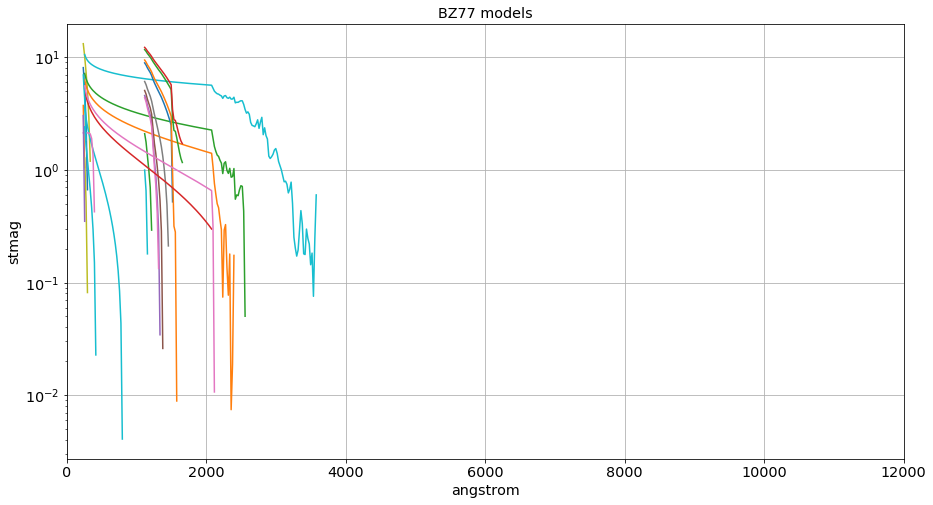

In [23]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("BZ77 models")
    plt.savefig("bz77.png")